In [1]:
#load all necessary libraries
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
claimants = pd.read_csv(r"C:\Users\excel\DATA Science\Datasets\claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
claimants.shape

(1340, 7)

In [4]:
claimants.nunique()

CASENUM     1283
ATTORNEY       2
CLMSEX         2
CLMINSUR       2
SEATBELT       2
CLMAGE        68
LOSS         916
dtype: int64

In [4]:
claimants.shape

(1340, 7)

In [5]:
# Dropping the case number columns as it is not required
claimants.drop(["CASENUM"], inplace=True, axis = 1)

In [6]:
#Shape of the data set
claimants.shape

(1340, 6)

In [ ]:
# Missing values

In [7]:
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [ ]:
claimants['CLMSEX'].value_counts()

In [8]:
claimants.dtypes

ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [8]:
# Removing NA values in data set
claimants = claimants.dropna()

In [9]:
claimants.shape

(1096, 6)

In [11]:
claimants.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [12]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


# Checking with linear regression model

In [10]:
# Dividing our data into input and output variables
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]
#Linear regression and fit the model
regressor = LinearRegression()
regressor.fit(X,Y)
regressor.score(X,Y)

0.06740699602264077

In [14]:
Y.shape, X.shape

((1096,), (1096, 5))

In [14]:
y_train

321     1
775     1
1007    1
205     0
672     1
       ..
104     1
815     0
194     0
470     0
787     0
Name: ATTORNEY, Length: 822, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 15)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((822, 5), (274, 5), (822,), (274,))

In [15]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
classifier.score(X_train,y_train)

0.708029197080292

In [16]:
classifier.score(X_test,y_test)

0.6970802919708029

In [17]:
y_pred = classifier.predict(X_train)
y_pred_df= pd.DataFrame({'actual': y_train,'predicted_prob': y_pred})  
y_pred_df.head()

,actual,predicted_prob
321,1,1
775,1,0
1007,1,1
205,0,1
672,1,1


In [ ]:
y_train.shape,y_pred.shape

In [18]:
# Confusion Matrix for the model accuracy
confusion_mt = confusion_matrix(y_train,y_pred)
confusion_mt

array([[296, 150],
       [ 90, 286]], dtype=int64)

In [21]:
(296+286)/(296+150+90+286)

0.708029197080292

In [15]:
#Classification report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       446
           1       0.66      0.76      0.70       376

    accuracy                           0.71       822
   macro avg       0.71      0.71      0.71       822
weighted avg       0.72      0.71      0.71       822



In [15]:
print('Accuracy:',(296+286)/(296+150+90+286))

Accuracy: 0.708029197080292


In [ ]:
## Precision – What percent of your predictions were correct?
## Recall – What percent of the positive cases did you catch?
## F1 score – What percent of positive predictions were correct?

In [31]:
y_predict_prob = classifier.predict_proba(X_train)[:,1]
y_predict_prob

array([5.67484365e-01, 3.61993744e-01, 5.62835617e-01, 6.09333737e-01,
       5.97982946e-01, 5.75703630e-01, 7.01627182e-01, 6.50009017e-01,
       2.98854488e-01, 7.37686068e-01, 1.98798209e-01, 6.67970919e-01,
       2.00604789e-01, 6.04776767e-01, 3.16223679e-01, 2.02379977e-06,
       5.76135726e-01, 3.18212461e-01, 6.91754810e-01, 6.09736138e-01,
       2.41134730e-01, 2.95531003e-01, 4.04863338e-02, 2.67020150e-01,
       6.87220364e-01, 4.26395698e-01, 5.88317860e-01, 6.16638965e-01,
       5.63461905e-01, 3.67034948e-01, 2.66154648e-01, 6.56750189e-01,
       5.67912081e-01, 7.33933028e-01, 4.86727472e-01, 6.57187797e-01,
       7.49618538e-01, 6.94657762e-01, 5.77572640e-01, 1.25032130e-01,
       3.24755147e-01, 6.39058991e-01, 4.31295723e-01, 8.95387894e-02,
       2.20080362e-01, 6.50894114e-01, 6.92932710e-01, 2.87586854e-01,
       5.33145402e-01, 7.19610607e-01, 6.59442318e-01, 6.62019841e-01,
       2.52941822e-01, 6.70217253e-01, 6.02669014e-01, 7.09906013e-14,
      

#### ROC Curve

In [32]:
# fpr: false positive rate, tpr: True positive rate.
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train, y_predict_prob)
auc = roc_auc_score(y_train, y_pred)
auc

0.7121577139585916

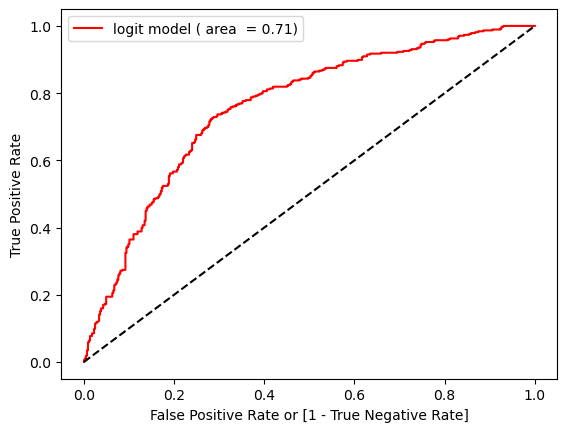

In [33]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [26]:
import os
os.getcwd()

'C:\\Users\\excel\\DATA Science\\Machine Learning'

In [34]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb')) # wb write binary mode

# evaluation 

In [37]:
clf = pickle.load(open('finalized_model.sav', 'rb')) # rb read binary mode

In [48]:
X = [[0,1,1,26,0]]
y_pred = clf.predict(X)
y_pred

C:\Users\excel\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [44]:
y_pred1 = clf.predict(X_test)
y_pred1

In [46]:
clf.score(X_test,y_test)

0.6970802919708029

In [49]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       132
           1       0.70      0.74      0.72       142

    accuracy                           0.70       274
   macro avg       0.70      0.70      0.70       274
weighted avg       0.70      0.70      0.70       274



In [ ]:
import os
os.listdir()

# Multinomial logistic regression

In [ ]:
Description Of Data: 
The data is sourced from study of Abalone in Tasmania. 
It can be found at the UCI Machine Learning Repository.
The dataset contains 4,177 observations and 9 variables. 

SEX = M (male), F (female), I (infant) 

LENGTH = Longest shell length in mm 

DIAM = Diameter perpendicular to length in mm 

HEIGHT = Height perpendicular to length and diameter in mm 

WHOLE = Whole weight of abalone in grams 

SHUCK = Shucked weight of meat in grams 

VISCERA = Viscera weight in grams 

SHELL = Shell weight after drying in grams 

RINGS = Age (+1.5 gives the age in years) 

There are 9 variables of which the first - SEX - will be used as the dependent variable.   
 Additional Information

Predicting the age of abalone from physical measurements.  
The age of abalone is determined by cutting the shell through the cone, staining it, 
and counting the number of rings through a microscope -- a boring and time-consuming task.  
Other measurements, which are easier to obtain, are used to predict the age.  
Further information, such as weather patterns and location 
(hence food availability) may be required to solve the problem.



In [50]:
#read the dataset
import pandas as pd
abalone_df = pd.read_csv(r"C:\Users\excel\DATA Science\Datasets\abalone.csv") 
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [52]:
abalone_df.count()

Sex               4177
Length            4177
Diameter          4177
Height            4177
Whole weight      4177
Shucked weight    4177
Viscera weight    4177
Shell weight      4177
Rings             4177
dtype: int64

In [51]:
#We are now ready to partition the dataset:
Abalone_sex = abalone_df['Sex'].value_counts()
print(Abalone_sex)

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


In [30]:
abalone_df.shape

(4177, 9)

In [53]:
abalone_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [56]:
#Create training and test datasets
X = abalone_df.drop(['Sex'], axis=1) 
y = abalone_df['Sex']
print(y.value_counts()) 

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


In [57]:
y = y.astype('category').cat.codes

In [58]:
y.value_counts()

2    1528
1    1342
0    1307
Name: count, dtype: int64

In [59]:
X_train_ab, X_test_ab, y_train_ab, y_test_ab = train_test_split(X, y, test_size = 0.20, 
                                                                random_state = 5)
print(X_train_ab.shape)
print(X_test_ab.shape)
print(y_train_ab.shape)
print(y_test_ab.shape)

(3341, 8)
(836, 8)
(3341,)
(836,)


In [60]:
model1 = LogisticRegression(multi_class='multinomial',penalty= None,solver='newton-cg')
model1.fit(X_train_ab, y_train_ab)

LogisticRegression(multi_class='multinomial', penalty=None, solver='newton-cg')

In [61]:
model1.score(X_train_ab, y_train_ab)

0.561807841963484

In [62]:
y_pred_ab = model1.predict(X_test_ab)
params = model1.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': None, 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [63]:
# Intercept And Coefficients:The intercept and coefficients are stored in model1.intercept and model1.coef_ respectively. Here we need to spend a bit of time, because the output of Sci-Kit Learn is different from what we may expect. 
#Print model parameters
print('Intercept: \n', model1.intercept_)
print('Coefficients: \n', model1.coef_)

Intercept: 
 [-1.80277476  1.05180366  0.7509711 ]
Coefficients: 
 [[-5.95079528  6.3549861   4.0581014   1.85718374 -2.70305322  6.17067119
  -1.54874124  0.06150835]
 [11.73732045 -6.18789729 -5.70439887 -4.1897914   2.81893249 -8.75502702
   3.12968292 -0.1225984 ]
 [-5.78652518 -0.16708881  1.64629747  2.33260765 -0.11587927  2.58435582
  -1.58094168  0.06109005]]


In [64]:
y_pred_df= pd.DataFrame({'actual': y_test_ab,'predicted_prob': y_pred_ab})  
y_pred_df.head()

,actual,predicted_prob
3342,2,1
791,0,2
1420,0,2
729,0,0
1186,0,0


In [65]:
#Accuracy statistics
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test_ab, y_pred_ab))  
#Create classification report
class_report=classification_report(y_test_ab, y_pred_ab)
print(class_report)

Accuracy Score: 0.5514354066985646
              precision    recall  f1-score   support

           0       0.49      0.33      0.40       270
           1       0.66      0.81      0.72       260
           2       0.48      0.53      0.50       306

    accuracy                           0.55       836
   macro avg       0.54      0.56      0.54       836
weighted avg       0.54      0.55      0.54       836



In [66]:
confmtrx = confusion_matrix(y_test_ab,y_pred_ab)
print(confmtrx)

[[ 90  44 136]
 [ 15 210  35]
 [ 79  66 161]]


In [67]:
result = pd.DataFrame(confmtrx, index=['Female','Infant', 'Male'],
                      columns=['predicted_Female', 'predicted_Infant', 'predicted_Male'])
print(result)

        predicted_Female  predicted_Infant  predicted_Male
Female                90                44             136
Infant                15               210              35
Male                  79                66             161


In [ ]:
# The first array contains three intercepts and the second  array contains three sets of regression coefficients.  
# In fact, the sklearn based output is different from the statsmodel version 
# (A discussion of Multinomial Logistic Regression with statsmodels is available below). 


# In this solution, there is an equation for each class. 
# These act as independent binary logistic regression models. 
# The actual output is log(p(y=c)/1 - p(y=c)), which are multinomial logit coefficients, 
# hence the three equations.  After exponentiating each regressor coefficient, we in fact get odds ratios. 
# The interpretation of the coefficients is for a single unit change in the predictor variable, 
# the log of odds will change by a factor indicated by the beta coefficient, given that all other 
# variables are held constant.  Log of odds is not really meaningful, so exponentiating the output gets a 
# slightly more user friendly output: 

#Calculate odds ratio estimates
import numpy as np
np.exp(model1.coef_)

In [ ]:
# Create DataFrame from confmtrx array  rows for test: Male, Female, Infant designation as index 
# columns for preds: male, predicted_female, predicted_infant as column
# confmtrx = confusion_matrix(y_test_ab,y_pred_ab)
# print(confmtrx)
pd.DataFrame(confmtrx, index=['Female','Infant', 'Male'],columns=['predicted_Female', 'predicted_Infant', 'predicted_Male'])


In [ ]:
# The accuracy of this model is poor with only 55% of predictions being correct. 
# The precision and recall of female and male abalone is very concerning as well.     

In [ ]:
!pip install flask
!pip install streamlit

In [54]:
import flask
import streamlit

In [53]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/b7/f9/9ad1e6e33e4ae149aead1ee8062e536d060b50d650df710899805562910a/streamlit-1.33.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB 325.1 kB/s eta 0:00:25
   ---------------------------------------- 0.1/8.1 MB 409.6 kB/s eta 0:00:20
    --------------------------------------- 0.2/8.1 MB 817.0 kB/s eta 0:00:10
   - -------------------------------------- 0.3/8.1 MB 1.4 MB/s eta 0:00:06
   --- ------------------------------------ 0.7/8.1 MB 2.5 MB/s eta 0:00:04
   ------ --------------------------------- 1.2/8.1 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
